## Sign Language MNIST 

To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (<b>and no cases for 9=J or 25=Z because of gesture motions</b>). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

<img src="datasets\sign_mnist\amer_sign2.png">

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Common imports
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2.1.0


In [2]:
DATASET_PATH = os.path.join("datasets", "sign_mnist")

def load_data(filename, datset_path=DATASET_PATH):
    csv_path = os.path.join(datset_path, filename)
    return pd.read_csv(csv_path)

In [3]:
# Load the test and train datasets.
train_df = load_data("sign_mnist_train.csv")
test_df = load_data("sign_mnist_test.csv")

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
print(train_df.shape)

(27455, 785)


In [7]:
# The label is in the first column, so move to y_train and drop from train dataset.
y_train=train_df['label']
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
# Do same to test dataset as we did for the train datset above
y_test=test_df['label']
testset=test_df.drop(['label'],axis=1)
testset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [9]:
# Lets reshape (Flatten) the datasets a check shape
X_train = trainset.values.reshape(-1,28,28,1)
X_test = testset.values.reshape(-1,28,28,1)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(y_test.size)

(27455, 28, 28, 1) (27455,) (7172, 28, 28, 1) (7172,)
7172


In [10]:
# We dont have a validation set, so lets trim off a validation set
# Take this from the training dataset and ensure its same size as test dataset
X_val, X_train = X_train[:y_test.size, ...], X_train[y_test.size:, ...]
y_val, y_train = y_train[:y_test.size], y_train[y_test.size:]

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)

(20283, 28, 28, 1) (20283,) (7172, 28, 28, 1) (7172,)
(7172, 28, 28, 1) (7172,)


In [11]:
# Unlike the 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow(X_train,y_train,batch_size=200)

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow(X_val,y_val,batch_size=200)

In [12]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(128,kernel_size=(5,5),
                  strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2),2,padding='same'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2),2,padding='same'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(25, activation=tf.nn.softmax))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          8

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs = 50,
                    validation_data = validation_generator,
                    shuffle=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 102 steps, validate for 36 steps
Epoch 1/50
102/102 [==============================] - 56s 548ms/step - loss: 3.1766 - accuracy: 0.0517 - val_loss: 3.1131 - val_accuracy: 0.0756
Epoch 2/50
102/102 [==============================] - 68s 670ms/step - loss: 2.9053 - accuracy: 0.1301 - val_loss: 2.2926 - val_accuracy: 0.3175
Epoch 3/50
102/102 [==============================] - 66s 643ms/step - loss: 2.5143 - accuracy: 0.2249 - val_loss: 1.8165 - val_accuracy: 0.4520
Epoch 4/50
102/102 [==============================] - 65s 639ms/step - loss: 2.1919 - accuracy: 0.3060 - val_loss: 1.4707 - val_accuracy: 0.5326
Epoch 5/50
102/102 [==============================] - 69s 677ms/step - loss: 1.8868 - accuracy: 0.3906 - val_loss: 1.0789 - val_accuracy: 0.6768
Epoch 6/50
102/102 [==============================] - 67s 659ms/step - loss: 1.5955 - accuracy: 0.4778 - val_loss: 0.8511 - val_accuracy: 0.7391
Epoch 7/50
102/102 [=================

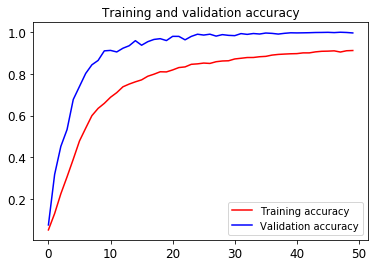

<Figure size 432x288 with 0 Axes>

In [15]:
# pd.DataFrame(history.history).plot(figsize=(8,5))
# plt.grid(True)
# plt.gca().set_ylim(0,2)
# plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

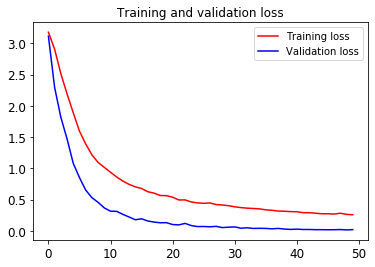

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [17]:
X_test=X_test/255
model.evaluate(X_test, y_test)

7172/7172 [==============================] - 5s 676us/sample - loss: 0.0378 - accuracy: 0.9908


[0.03781490674480272, 0.9907975]